### Algorithm
- Suppose we have a (1000,2) size data
1. #### Preprocessing
    - Find a vector, for projecting the data points on it

2. #### Covariance matrix
    - For 2 features, we get a 2 x 2 matrix
$$Cov(x,y) = \sum\limits_{i=1}^m\dfrac{(x - \bar{x})(y - \bar{y})}{N-1}$$
Hence are matrix looks like,
$$ \begin{bmatrix} Cov(x_1, x_1) & Cov(x_1, x_2) \\
Cov(x_2, x_1) & Cov(x_2, x_2) \end{bmatrix} $$
Which turns out to be a symmetric matrix
  

3. #### Eigen vector calculation
    - Find the eigen vector the get the direction of the vector for projecting
    - We use a function called `SVD` (Singular Value Decompositions)
    - SVD gives us U, S, V
    - We only use U
    - U is a $n \times n$ matrix, and we choose the best k
    - `U = U[:, :k]` $(n \times k)$

4. #### Projection
    - $Z^{(i)} = U_{red}^T \times x^{(i)} $
    - To get Z of $(k \times 1)$ shape

### Implementation

In [1]:
# Importing MNIST again, from Keras this time
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000,))

#### Visualising one row

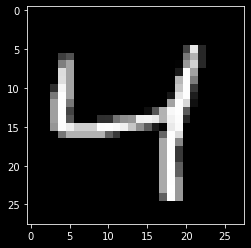

In [3]:
plt.imshow(x_train[2], cmap="gray")
plt.show()

We see all the data are images of $(28 \times 28)$ and show a number to be classified

In [4]:
X_ = x_train.reshape(-1, 28*28)
X_.shape

(60000, 784)

We now have 784 features for every row

#### Using SkLearn to scale our data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
X_ = sc.fit_transform(X_)
X_.shape

(60000, 784)

Our data has been rescaled for $\mu = 0$ and $\sigma = 1$

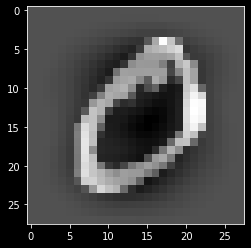

In [8]:
plt.imshow(X_[1].reshape(28,28), cmap="gray")
plt.show()

Our data is still intact, just a bit hazed

### PCA using inbuilt SKLearn

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2) # We want only 2 final components

In [11]:
z_pca = pca.fit_transform(X_)
z_pca.shape

(60000, 2)

We have successfully applied PCA, and converted 784 features to just 2 features :fire:

In [12]:
pca.explained_variance_

array([40.48763508, 29.24169574])

This shows the variance of the features that we just extracted
- This shows the total variance of 40  + 29 = 69
- This means that in these 2 features we managed to get 69% of the information of 784 features

### Custom PCA

#### Step 1 - Data Preprocessing (Already done)

#### Step 2 - Calculate Covariance Matrix

In [13]:
covar = np.dot(X_.T, X_)
covar.shape

(784, 784)

We have got the expected $784 \times 784$ matrix

#### Step 3 - Compute Eigen Vectors
- We use `svd` already offered by numpy

In [14]:
U, S, V = np.linalg.svd(covar)
U.shape

(784, 784)

In [15]:
# Getting U reduced for 2
Ured = U[:, :2]
Ured.shape

(784, 2)

#### Step 4 - Projection

In [16]:
Z = np.dot(X_, Ured)
Z.shape

(60000, 2)

We have got the required 2 feature compaction

In [17]:
print(-Z)
print(z_pca)

[[ 0.92215881  4.81479035]
 [-8.70897698  7.75440302]
 [-2.32838932 -9.43133817]
 ...
 [ 3.77721201  3.23056436]
 [-1.72236917  4.94812525]
 [ 1.42725062  6.17538558]]
[[-0.92213634 -4.81508836]
 [ 8.70870521 -7.75238076]
 [ 2.32840196  9.43069554]
 ...
 [-3.77715406 -3.23093948]
 [ 1.72214394 -4.94633175]
 [-1.42741494 -6.17409405]]


We see that the results are quite similar, hence our PCA has been done correctly!

### Visualising the data

In [18]:
new_data = np.hstack((Z, y_train.reshape(-1, 1)))
new_data.shape

(60000, 3)

In [19]:
import pandas as pd
# Creating a df

df = pd.DataFrame(new_data, columns=["PC1", "PC2", "label"])
df.head()

,PC1,PC2,label
0,-0.922159,-4.814790,5.0
1,8.708977,-7.754403,0.0
2,2.328389,9.431338,4.0
3,-6.582173,-3.746318,1.0
4,-5.183251,3.133297,9.0


In [20]:
import seaborn as sns

<Figure size 1080x720 with 0 Axes>

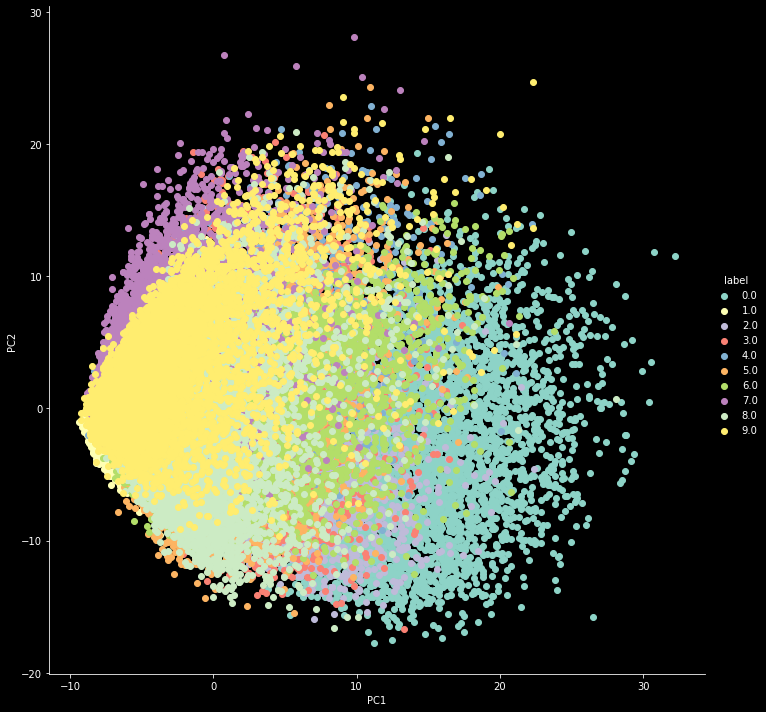

In [21]:
plt.figure(figsize=(15,10))
fg = sns.FacetGrid(df, hue="label", height = 10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

We see a nice visualisation of our labels and how they are dependent, also the huge merging is due to reducing 784 to just 2 features and losing 30% of our data

### Trying PCA with 784 features

In [22]:
pca = PCA()

In [23]:
z_pca = pca.fit_transform(X_)
z_pca.shape

(60000, 784)

Now we have the complete 784 features with us

In [24]:
pca.explained_variance_

array([4.04876351e+01, 2.92416975e+01, 2.68118045e+01, 2.06866182e+01,
       1.80766501e+01, 1.57331779e+01, 1.37906091e+01, 1.25175891e+01,
       1.10067953e+01, 1.00504971e+01, 9.62045779e+00, 8.63097356e+00,
       7.99159687e+00, 7.81488215e+00, 7.37553786e+00, 7.13058751e+00,
       6.71398002e+00, 6.60400749e+00, 6.40604846e+00, 6.23737743e+00,
       5.93229172e+00, 5.76059855e+00, 5.48403364e+00, 5.31859721e+00,
       5.12873534e+00, 4.96062446e+00, 4.90533662e+00, 4.70843497e+00,
       4.52919760e+00, 4.39470849e+00, 4.27522172e+00, 4.21399693e+00,
       4.09838079e+00, 4.03181137e+00, 3.97713624e+00, 3.86052409e+00,
       3.80864021e+00, 3.72563426e+00, 3.64393543e+00, 3.44169730e+00,
       3.41624517e+00, 3.36378527e+00, 3.25773631e+00, 3.23620323e+00,
       3.20478100e+00, 3.17911021e+00, 3.14205728e+00, 3.08588859e+00,
       3.06076556e+00, 3.03759974e+00, 2.90171955e+00, 2.86408562e+00,
       2.84980787e+00, 2.82374220e+00, 2.76632955e+00, 2.71778127e+00,
      

We see as we go down, the magnitude highly decreases, hence we dont need those per say

Using cummulative summing to visualise

In [25]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
cum_var

array([0.05646717, 0.09724989, 0.13464369, 0.16349484, 0.18870593,
       0.21064863, 0.22988207, 0.24734006, 0.26269099, 0.27670818,
       0.29012561, 0.30216303, 0.31330873, 0.32420796, 0.33449446,
       0.34443932, 0.35380315, 0.36301361, 0.37194798, 0.3806471 ,
       0.38892074, 0.39695491, 0.40460336, 0.41202109, 0.41917402,
       0.42609249, 0.43293384, 0.43950059, 0.44581736, 0.45194656,
       0.45790911, 0.46378627, 0.46950219, 0.47512526, 0.48067208,
       0.48605627, 0.49136809, 0.49656415, 0.50164626, 0.50644631,
       0.51121087, 0.51590227, 0.52044576, 0.52495921, 0.52942885,
       0.53386268, 0.53824483, 0.54254865, 0.54681743, 0.5510539 ,
       0.55510086, 0.55909534, 0.5630699 , 0.56700811, 0.57086624,
       0.57465667, 0.57841069, 0.58211845, 0.5857679 , 0.5893609 ,
       0.59288472, 0.59636266, 0.59980677, 0.60320546, 0.606565  ,
       0.60991386, 0.6132325 , 0.61646276, 0.61962553, 0.62275797,
       0.62586528, 0.62893771, 0.63198685, 0.63501403, 0.63800

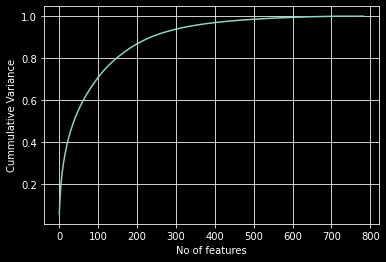

In [26]:
plt.plot(cum_var)
plt.grid()
plt.xlabel("No of features")
plt.ylabel("Cummulative Variance")
plt.show()

We can clearly see that we reach 90% at around 200 features, and achieve saturation at 500, according to our use case, we can decide features that we need and the PCA to be done